In [8]:
# --- Cell 1: Our Toolkit (Importing Libraries) ---
# Let's gather the tools for building, training, and judging our models.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Here are our contestants - the different model types we'll be testing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# And here are the tools we'll use to score their performance
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

In [9]:
# --- Cell 2: Preparing the Competition Arena ---
# Before the bake-off begins, we need to prepare our data.

print("--- Step 1: Loading the clean dataset ---")
df = pd.read_csv('../data/heart_disease_cleaned.csv')
X = df.drop('target', axis=1) # The features our models will learn from
y = df['target']             # The true outcome they need to predict

# We split our data into two key sets:
# 1. A 'training set' for the models to learn from.
# 2. A 'testing set' that the models have NEVER seen before, to fairly judge their performance.
# 'stratify=y' ensures both sets have a similar mix of patients with and without heart disease.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data has been split into training and testing sets.")

# Some models are sensitive to the scale of the data (e.g., cholesterol in the 100s vs. sex as 0/1).
# We'll scale our features so that every clue is on a level playing field.
print("\n--- Step 2: Scaling the features for a fair competition ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data is prepped and the competition is ready to begin!")

--- Step 1: Loading the clean dataset ---
Data has been split into training and testing sets.

--- Step 2: Scaling the features for a fair competition ---
Data is prepped and the competition is ready to begin!


In [10]:
# --- Cell 3: The Bake-Off! Training and Evaluating Our Models ---
# Let's introduce our contestants and see how well they perform.

# Here's our lineup of competing models, each with a different strategy.
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42)
}

# We'll create a place to store the final scores.
results = {}

print("\n--- THE BAKE-OFF BEGINS! ---")

# Let's loop through each model, train it, and judge its predictions.
for name, model in models.items():
    print(f"\n--- Contestant: {name} ---")
    
    # Step 1: Train the model on the training data.
    model.fit(X_train_scaled, y_train)
    
    # Step 2: Ask the model to make predictions on the unseen test data.
    predictions = model.predict(X_test_scaled)
    
    # Step 3: Judge the performance.
    # We'll look at a full report card, not just one score.
    print("Performance Report Card:")
    print(classification_report(y_test, predictions))
    
    # Let's calculate the key metrics for our summary.
    accuracy = accuracy_score(y_test, predictions)
    # The AUC score is a great single number for judging overall performance.
    # It tells us how well the model can distinguish between the two classes.
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
    print(f"Overall Accuracy: {accuracy:.4f}")
    print(f"Overall AUC Score: {auc:.4f}")
    
    # Store the results for our final comparison.
    results[name] = {'accuracy': accuracy, 'auc': auc}


--- THE BAKE-OFF BEGINS! ---

--- Contestant: Logistic Regression ---
Performance Report Card:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

Overall Accuracy: 0.8488
Overall AUC Score: 0.9415

--- Contestant: Decision Tree ---
Performance Report Card:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Overall Accuracy: 0.9854
Overall AUC Score: 0.9857

--- Contestant: Random Forest ---
Performance Report Card:
              precision    r


--- Visualizing the Competition: ROC Curves ---


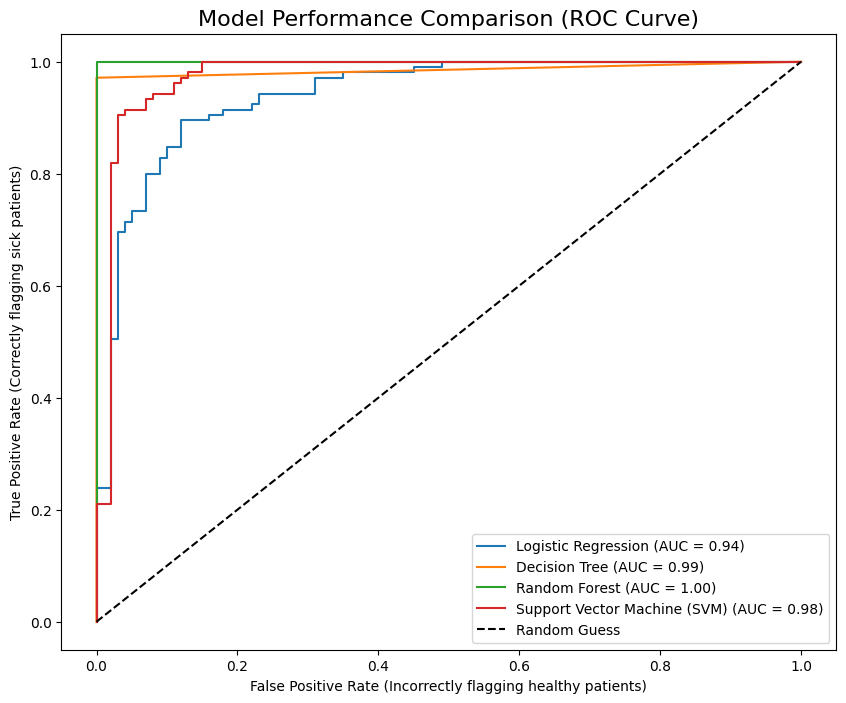

In [11]:
# --- Cell 4: Visualizing the Results - The ROC Curve ---
# The ROC (Receiver Operating Characteristic) curve is the best way to visualize
# how well our models are performing. A curve that hugs the top-left corner is better.
# The "Area Under the Curve" (AUC) is the number we calculated, which summarizes this graph.

print("\n--- Visualizing the Competition: ROC Curves ---")
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get the model's prediction probabilities
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    # Calculate the points for the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    # Get the AUC score for the label
    auc = results[name]['auc']
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# The "coin flip" line - a good model should be well above this.
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (Incorrectly flagging healthy patients)')
plt.ylabel('True Positive Rate (Correctly flagging sick patients)')
plt.title('Model Performance Comparison (ROC Curve)', size=16)
plt.legend()
plt.show()

In [12]:
# --- Cell 5: Announcing the Winner and Saving the Results ---
# Let's print a final summary scoreboard and save our findings to a file for later.

print("\n--- FINAL SCOREBOARD ---")
results_df = pd.DataFrame(results).T.sort_values(by='auc', ascending=False)
print(results_df)

# Let's save these detailed reports to a text file for our records.
print("\nSaving the detailed performance reports to 'results/evaluation_metrics.txt'...")
with open("../results/evaluation_metrics.txt", "w") as f:
    for name, model in models.items():
        f.write(f"--- Performance Report for: {name} ---\n")
        f.write(f"Accuracy: {results[name]['accuracy']:.4f}\n")
        f.write(f"AUC Score: {results[name]['auc']:.4f}\n")
        predictions = model.predict(X_test_scaled)
        f.write(f"Full Classification Report:\n{classification_report(y_test, predictions)}\n\n")

print("Reports saved successfully!")


--- FINAL SCOREBOARD ---
                              accuracy       auc
Random Forest                 1.000000  1.000000
Decision Tree                 0.985366  0.985714
Support Vector Machine (SVM)  0.926829  0.975429
Logistic Regression           0.848780  0.941524

Saving the detailed performance reports to 'results/evaluation_metrics.txt'...
Reports saved successfully!
